In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA/BAAD16DATASET")
!ls

Dataset1.csv  Dataset2.csv


In [ ]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("Dataset*.csv")


# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
data = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(data)

Resultant CSV after joining all CSV files at a particular location...
                     label                                               text  \
0      shunil_gongopaddhay  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1            humayun_ahmed  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2                 shomresh  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3            humayun_ahmed  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...   
4            humayun_ahmed  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   
...                    ...                                                ...   
17961            shordindu  করিয়া সহজভাবে বলিল—ঘোড়া দুটিকে বৰ্গা খুলিয়া ছা...   
17962  shunil_gongopaddhay  না। আমরা সবাই থোড়া কুচ সাবক্রিপশান দিয়ে মেয়েটা...   
17963  shunil_gongopaddhay  কাকাবাবু, আমি আগে কখনও অজ্ঞান হইনি। নিজের কাছে...   
17964   nihar_ronjon_gupta  মধ্যে প্রবেশ করলেন। প্রথমেই ওরা সুশান্ত মল্লিক...   
17965        humayun_ahmed  আপনার অফিস?

In [ ]:
data['label'].unique()

array(['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu',
       'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin',
       'zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath',
       'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'],
      dtype=object)

In [ ]:
data.shape
data.dtypes

label       object
text        object
is_valid      bool
dtype: object

In [ ]:
data.shape

(17966, 3)

In [ ]:
data.drop_duplicates(keep=False, inplace=True)

In [ ]:
data.shape

(17966, 3)

In [ ]:
data.isnull().any()

label       False
text        False
is_valid    False
dtype: bool

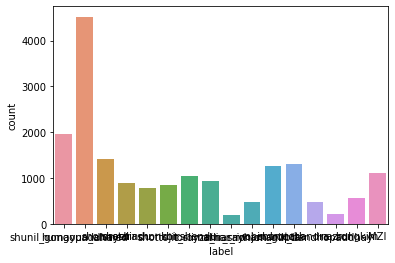

In [ ]:
sns.countplot(data.label)

In [ ]:
data['text_length'] = data['text'].str.len()
print(data['text_length'])

0        4460
1        4202
2        4252
3        4153
4        4522
         ... 
17961    4949
17962    4593
17963    4404
17964    4265
17965    4193
Name: text_length, Length: 17966, dtype: int64


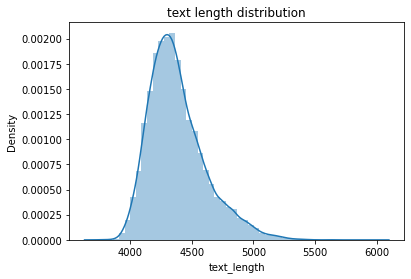

In [ ]:
sns.distplot(data['text_length']).set_title('text length distribution');

In [ ]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

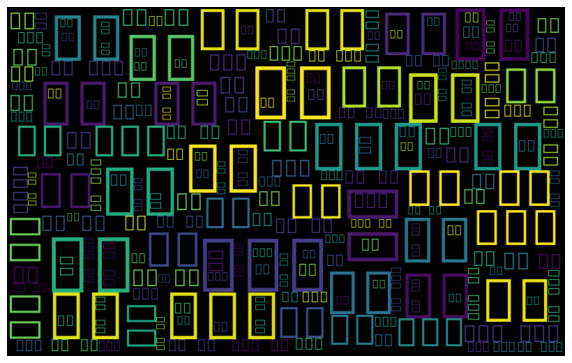

In [ ]:
subset=data[data.label=="humayun_ahmed"]
text=subset.text.values
words =" ".join(text)
create_wordcloud(words)

In [ ]:
#Feature Engineering
#Removing the special characters
#1) \r
#2) \n

#Removing Punctuations and Stopwords

def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    stop_words = pd.read_csv('Stopwords.csv')
    #stop_words = set(stopwords.words('Stopwords.csv')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text


data['Text_parsed'] = data['text'].apply(process_text)
data.head()

In [ ]:
X = data['text'].values

In [ ]:
#Label Encoding


from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Category_target']= label_encoder.fit_transform(data['label']) 
#BBC_News.head()


In [ ]:

#Split the data in Training and testing
X_train, X_test, y_train, y_test = train_test_split(data['text'], 
                                                    data['label'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [ ]:
print(X_train.shape)

print(X_test.shape)

(14372,)
(3594,)


In [ ]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0.         0.07924924 0.         ... 0.14449837 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.07963298]
 [0.         0.         0.06840274 ... 0.         0.         0.        ]
 ...
 [0.10243176 0.         0.         ... 0.         0.         0.        ]
 [0.         0.06186569 0.06328521 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(3594, 300)


In [ ]:
#SVM

from sklearn.svm import SVC
model = SVC()

model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))
#model.fit(X_train, y_train)

Accuracy:  0.9835837506956038
                     precision    recall  f1-score   support

                MZI       0.98      0.98      0.98       200
            bongkim       0.99      0.98      0.99       123
      humayun_ahmed       0.99      1.00      0.99       903
manik_bandhopaddhay       0.99      0.96      0.97        98
             nazrul       0.95      0.85      0.90        47
 nihar_ronjon_gupta       1.00      1.00      1.00        78
       robindronath       0.97      0.97      0.97       257
         shirshendu       0.97      0.98      0.97       195
           shomresh       0.99      0.98      0.98       287
          shordindu       1.00      0.99      1.00       178
      shorotchandra       0.97      0.98      0.98       257
      shottojit_roy       1.00      0.99      1.00       169
shunil_gongopaddhay       0.99      0.98      0.98       411
        tarashonkor       0.96      0.99      0.97       173
     toslima_nasrin       0.99      0.98      0.99    

In [ ]:
#Building Models
#Random Forest


from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8789649415692822
                     precision    recall  f1-score   support

                MZI       0.98      0.87      0.92       200
            bongkim       0.95      0.92      0.93       123
      humayun_ahmed       0.81      1.00      0.90       903
manik_bandhopaddhay       0.98      0.61      0.75        98
             nazrul       1.00      0.36      0.53        47
 nihar_ronjon_gupta       0.95      0.49      0.64        78
       robindronath       0.86      0.77      0.81       257
         shirshendu       0.92      0.81      0.86       195
           shomresh       0.93      0.86      0.90       287
          shordindu       0.93      0.92      0.92       178
      shorotchandra       0.83      0.93      0.87       257
      shottojit_roy       0.96      0.93      0.95       169
shunil_gongopaddhay       0.90      0.91      0.91       411
        tarashonkor       0.88      0.79      0.84       173
     toslima_nasrin       0.87      0.94      0.91    

In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Hyper Paramater Tuning(Random Forest)

from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [ ]:
bestF.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8792431830829159
                     precision    recall  f1-score   support

                MZI       0.98      0.86      0.92       200
            bongkim       0.95      0.92      0.93       123
      humayun_ahmed       0.81      1.00      0.89       903
manik_bandhopaddhay       0.97      0.62      0.76        98
             nazrul       1.00      0.36      0.53        47
 nihar_ronjon_gupta       0.97      0.47      0.64        78
       robindronath       0.85      0.78      0.81       257
         shirshendu       0.93      0.81      0.87       195
           shomresh       0.93      0.87      0.90       287
          shordindu       0.91      0.92      0.92       178
      shorotchandra       0.83      0.92      0.87       257
      shottojit_roy       0.97      0.93      0.95       169
shunil_gongopaddhay       0.91      0.91      0.91       411
        tarashonkor       0.89      0.78      0.83       173
     toslima_nasrin       0.88      0.94      0.91    

In [ ]:
#Logistic Regression


model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9654980523094046
                     precision    recall  f1-score   support

                MZI       0.97      0.95      0.96       200
            bongkim       0.94      0.97      0.95       123
      humayun_ahmed       0.97      1.00      0.98       903
manik_bandhopaddhay       1.00      0.90      0.95        98
             nazrul       0.97      0.70      0.81        47
 nihar_ronjon_gupta       0.97      0.97      0.97        78
       robindronath       0.91      0.95      0.93       257
         shirshendu       0.97      0.94      0.96       195
           shomresh       0.97      0.98      0.98       287
          shordindu       0.97      0.96      0.97       178
      shorotchandra  

In [ ]:
#Hyper Parameter Tuning (Logistic Regression)

param_grid = {'C': [0.1,0.001,1],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'C': 1, 'penalty': 'l2'}

In [ ]:
model = LogisticRegression(C=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9654980523094046
                     precision    recall  f1-score   support

                MZI       0.97      0.95      0.96       200
            bongkim       0.94      0.97      0.95       123
      humayun_ahmed       0.97      1.00      0.98       903
manik_bandhopaddhay       1.00      0.90      0.95        98
             nazrul       0.97      0.70      0.81        47
 nihar_ronjon_gupta       0.97      0.97      0.97        78
       robindronath       0.91      0.95      0.93       257
         shirshendu       0.97      0.94      0.96       195
           shomresh       0.97      0.98      0.98       287
          shordindu       0.97      0.96      0.97       178
      shorotchandra       0.95      0.94      0.94       257
      shottojit_roy       0.99      0.99      0.99       169
shunil_gongopaddhay       0.97      0.99      0.98       411
        tarashonkor       0.94      0.94      0.94       173
     toslima_nasrin       0.96      0.99      0.97    

In [ ]:
#KNeighborsClassifier


model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9393433500278241
                     precision    recall  f1-score   support

                MZI       0.97      0.97      0.97       200
            bongkim       0.96      0.89      0.92       123
      humayun_ahmed       0.97      0.98      0.98       903
manik_bandhopaddhay       0.97      0.89      0.93        98
             nazrul       0.97      0.74      0.84        47
 nihar_ronjon_gupta       0.95      0.92      0.94        78
       robindronath       0.85      0.96      0.90       257
         shirshendu       0.93      0.83      0.88       195
           shomresh       0.90      0.96      0.93       287
          shordindu       0.93      0.96      0.94       178
      shorotchandra       0.91      0.94      0.92       257
      shottojit_roy       0.93      0.99      0.96       169
shunil_gongopaddhay       0.96      0.96      0.96       411
        tarashonkor       0.96      0.80      0.87       173
     toslima_nasrin       0.97      0.90      0.94    

In [ ]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#Hyper Paramaters Tuning (KNeighborsClassifier)

from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [ ]:
bestF.best_params_

{'n_neighbors': 7, 'p': 1}

In [ ]:
model = KNeighborsClassifier(n_neighbors=7,p=2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9418475236505287
                     precision    recall  f1-score   support

                MZI       0.97      0.97      0.97       200
            bongkim       0.97      0.92      0.94       123
      humayun_ahmed       0.97      0.98      0.98       903
manik_bandhopaddhay       0.99      0.89      0.94        98
             nazrul       0.95      0.77      0.85        47
 nihar_ronjon_gupta       0.97      0.91      0.94        78
       robindronath       0.84      0.96      0.89       257
         shirshendu       0.91      0.83      0.87       195
           shomresh       0.89      0.97      0.93       287
          shordindu       0.96      0.96      0.96       178
      shorotchandra       0.92      0.94      0.93       257
      shottojit_roy       0.94      0.99      0.97       169
shunil_gongopaddhay       0.94      0.96      0.95       411
        tarashonkor       0.95      0.82      0.88       173
     toslima_nasrin       0.98      0.90      0.94    

In [ ]:
#Decision Tree


model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.6892042292710072
                     precision    recall  f1-score   support

                MZI       0.76      0.82      0.79       200
            bongkim       0.69      0.74      0.72       123
      humayun_ahmed       0.84      0.85      0.84       903
manik_bandhopaddhay       0.44      0.42      0.43        98
             nazrul       0.40      0.36      0.38        47
 nihar_ronjon_gupta       0.32      0.32      0.32        78
       robindronath       0.63      0.63      0.63       257
         shirshendu       0.49      0.50      0.50       195
           shomresh       0.64      0.64      0.64       287
          shordindu       0.63      0.61      0.62       178
      shorotchandra       0.74      0.73      0.74       257
      shottojit_roy       0.67      0.72      0.70       169
shunil_gongopaddhay       0.71      0.67      0.69       411
        tarashonkor       0.61      0.52      0.56       173
     toslima_nasrin       0.71      0.69      0.70    

In [ ]:

model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [ ]:
#Hyper Paramter Tuning (Decision Tree)

import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:

bestF.best_params_


{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5}

In [ ]:
model = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= None,min_samples_leaf=6)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7022815804117974
                     precision    recall  f1-score   support

                MZI       0.68      0.76      0.72       200
            bongkim       0.70      0.67      0.69       123
      humayun_ahmed       0.80      0.86      0.83       903
manik_bandhopaddhay       0.37      0.36      0.36        98
             nazrul       0.53      0.34      0.42        47
 nihar_ronjon_gupta       0.27      0.29      0.28        78
       robindronath       0.65      0.64      0.65       257
         shirshendu       0.59      0.61      0.60       195
           shomresh       0.68      0.66      0.67       287
          shordindu       0.71      0.73      0.72       178
      shorotchandra       0.77      0.76      0.77       257
      shottojit_roy       0.78      0.73      0.76       169
shunil_gongopaddhay       0.74      0.67      0.71       411
        tarashonkor       0.60      0.57      0.58       173
     toslima_nasrin       0.72      0.68      0.70    

In [ ]:

#GaussianNB

model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8358375069560379
                     precision    recall  f1-score   support

                MZI       0.82      0.92      0.86       200
            bongkim       0.37      0.90      0.52       123
      humayun_ahmed       0.98      0.91      0.94       903
manik_bandhopaddhay       0.95      0.79      0.86        98
             nazrul       0.66      0.79      0.72        47
 nihar_ronjon_gupta       0.58      0.97      0.72        78
       robindronath       0.85      0.43      0.57       257
         shirshendu       0.82      0.84      0.83       195
           shomresh       0.91      0.91      0.91       287
          shordindu       0.87      0.62      0.72       178
      shorotchandra       0.86      0.84      0.85       257
      shottojit_roy       0.93      0.96      0.94       169
shunil_gongopaddhay       0.89      0.86      0.88       411
        tarashonkor       0.88      0.71      0.79       173
     toslima_nasrin       0.83      0.93      0.88    

##Doc2Vec

In [ ]:
X = data['text'].values

In [ ]:
Doc = pd.DataFrame()
Doc['text'] = data['text'].values
Doc['label'] = data['Category_target']
Doc.head()

text  label
0  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...     12
1  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...      2
2  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...      8
3  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...      2
4  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...      2

In [ ]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []

    
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


X_train, X_test, y_train, y_test = train_test_split(Doc.text, Doc.label, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [ ]:

all_data[0:2]

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 17966/17966 [00:00<00:00, 1912948.46it/s]


In [ ]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

# ##**SVM**

In [ ]:
#SVM
from sklearn.svm import SVC
model = SVC()

model= model.fit(train_vectors_dbow, y_train)
model_prediction= model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))


accuracy 0.9992578849721707
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       188
           2       1.00      1.00      1.00      1375
           3       1.00      0.99      1.00       136
           4       1.00      0.99      0.99        72
           5       1.00      1.00      1.00       127
           6       1.00      1.00      1.00       378
           7       1.00      1.00      1.00       312
           8       1.00      1.00      1.00       411
           9       1.00      1.00      1.00       252
          10       1.00      1.00      1.00       385
          11       1.00      1.00      1.00       278
          12       1.00      1.00      1.00       590
          13       1.00      1.00      1.00       227
          14       1.00      1.00      1.00       287
          15       1.00      0.98      0.99        60

    accuracy                           1.00      539

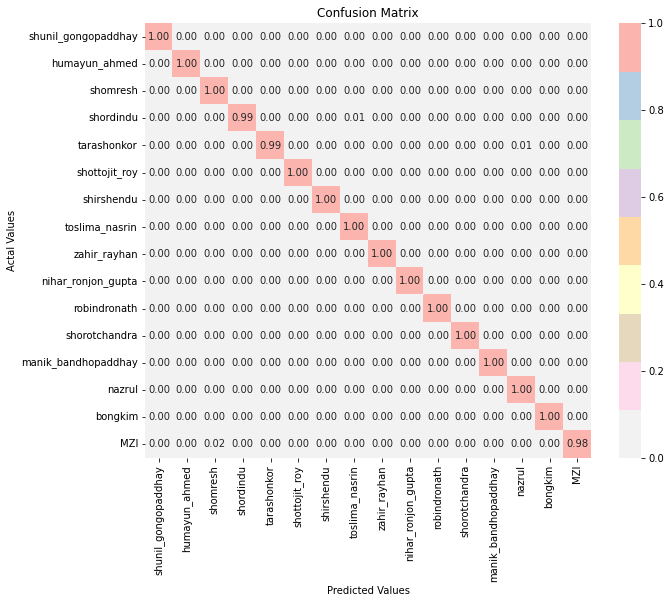

In [ ]:
# SVM Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'],

                     columns = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## **Logistic Regression**

In [ ]:
#Logistic Regression

model = LogisticRegression()

model=model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))


accuracy 0.9996289424860854
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       312
           1       1.00      1.00      1.00       188
           2       1.00      1.00      1.00      1375
           3       0.99      0.99      0.99       136
           4       1.00      1.00      1.00        72
           5       1.00      1.00      1.00       127
           6       1.00      1.00      1.00       378
           7       1.00      1.00      1.00       312
           8       1.00      1.00      1.00       411
           9       1.00      1.00      1.00       252
          10       1.00      1.00      1.00       385
          11       1.00      1.00      1.00       278
          12       1.00      1.00      1.00       590
          13       1.00      1.00      1.00       227
          14       1.00      1.00      1.00       287
          15       1.00      1.00      1.00        60

    accuracy                           1.00      539

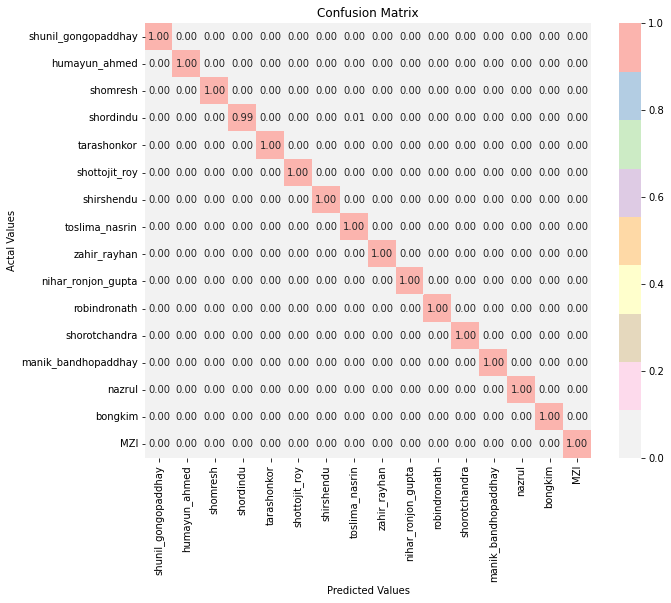

In [ ]:
# Logistic Regression Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'],

                     columns = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## **Gaussian Naive Bayes**

In [ ]:

model = GaussianNB()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9964749536178108
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       312
           1       0.99      1.00      1.00       188
           2       1.00      1.00      1.00      1375
           3       1.00      0.99      1.00       136
           4       1.00      0.99      0.99        72
           5       1.00      1.00      1.00       127
           6       1.00      1.00      1.00       378
           7       0.99      0.99      0.99       312
           8       1.00      1.00      1.00       411
           9       0.97      1.00      0.98       252
          10       1.00      0.99      1.00       385
          11       1.00      1.00      1.00       278
          12       1.00      1.00      1.00       590
          13       1.00      1.00      1.00       227
          14       0.98      1.00      0.99       287
          15       1.00      0.97      0.98        60

    accuracy                           1.00      539

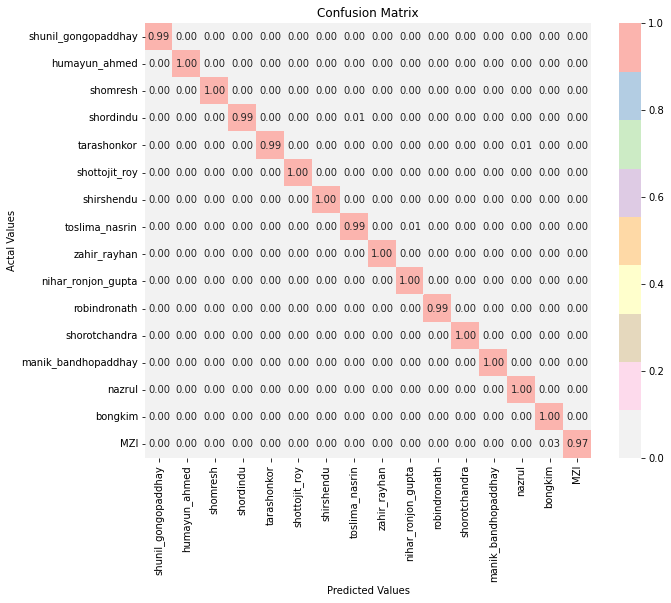

In [ ]:
# Naive Bayes Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'],

                     columns = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.6358070500927644
              precision    recall  f1-score   support

           0       0.91      0.40      0.56       312
           1       0.99      0.76      0.86       188
           2       0.45      1.00      0.62      1375
           3       1.00      0.12      0.21       136
           4       1.00      0.01      0.03        72
           5       1.00      0.13      0.24       127
           6       0.85      0.74      0.79       378
           7       0.97      0.36      0.52       312
           8       0.90      0.40      0.55       411
           9       0.98      0.56      0.71       252
          10       0.88      0.89      0.89       385
          11       1.00      0.27      0.43       278
          12       0.79      0.78      0.78       590
          13       1.00      0.30      0.47       227
          14       0.95      0.37      0.53       287
          15       0.00      0.00      0.00        60

    accuracy                           0.64      539

In [ ]:
#Hyper Parameter Tuning (Random Forest)
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

In [ ]:
bestF.best_params_

In [ ]:

model = RandomForestClassifier(max_depth=15,min_samples_leaf=1,min_samples_split=2,n_estimators=1200)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.647495361781076
              precision    recall  f1-score   support

           0       1.00      0.34      0.51       312
           1       1.00      0.81      0.90       188
           2       0.43      1.00      0.60      1375
           3       1.00      0.07      0.14       136
           4       0.00      0.00      0.00        72
           5       1.00      0.08      0.15       127
           6       0.95      0.75      0.83       378
           7       1.00      0.39      0.56       312
           8       1.00      0.42      0.59       411
           9       1.00      0.62      0.77       252
          10       0.93      0.91      0.92       385
          11       1.00      0.27      0.42       278
          12       0.90      0.86      0.88       590
          13       1.00      0.30      0.47       227
          14       1.00      0.35      0.52       287
          15       0.00      0.00      0.00        60

    accuracy                           0.65      5390

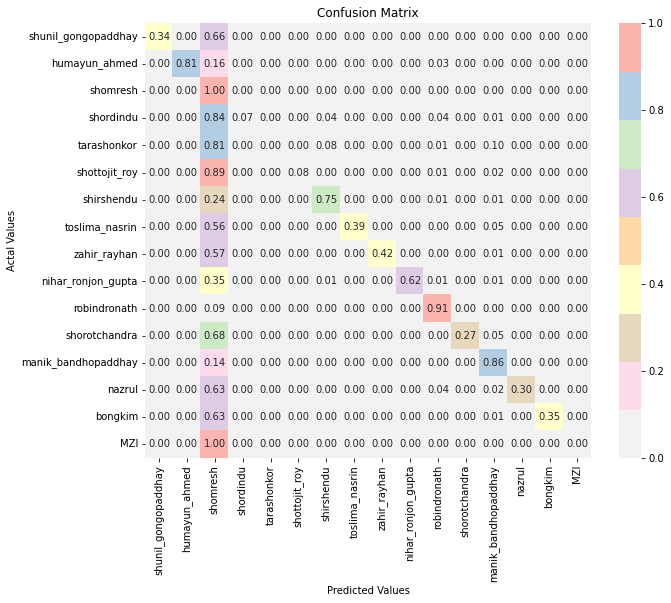

In [ ]:
# Random Forest Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'],

                     columns = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#Decision Tree
model = DecisionTreeClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.3289424860853432
              precision    recall  f1-score   support

           0       0.26      0.31      0.28       312
           1       0.24      0.20      0.22       188
           2       0.54      0.53      0.54      1375
           3       0.12      0.10      0.11       136
           4       0.05      0.04      0.05        72
           5       0.17      0.18      0.18       127
           6       0.30      0.28      0.29       378
           7       0.22      0.24      0.23       312
           8       0.22      0.24      0.23       411
           9       0.20      0.21      0.20       252
          10       0.38      0.38      0.38       385
          11       0.27      0.24      0.25       278
          12       0.37      0.37      0.37       590
          13       0.21      0.24      0.22       227
          14       0.20      0.20      0.20       287
          15       0.05      0.05      0.05        60

    accuracy                           0.33      539

In [ ]:
#Hyper Parameter Tuning (Decision Tree)
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(train_vectors_dbow, y_train)

In [ ]:
bestF.best_params_

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=7)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.3580705009276438
              precision    recall  f1-score   support

           0       0.26      0.29      0.27       312
           1       0.34      0.35      0.34       188
           2       0.50      0.56      0.53      1375
           3       0.20      0.17      0.18       136
           4       0.19      0.08      0.12        72
           5       0.25      0.24      0.25       127
           6       0.29      0.29      0.29       378
           7       0.23      0.23      0.23       312
           8       0.29      0.32      0.30       411
           9       0.18      0.16      0.17       252
          10       0.43      0.42      0.42       385
          11       0.29      0.27      0.28       278
          12       0.41      0.40      0.40       590
          13       0.20      0.18      0.19       227
          14       0.33      0.26      0.29       287
          15       0.11      0.07      0.08        60

    accuracy                           0.36      539

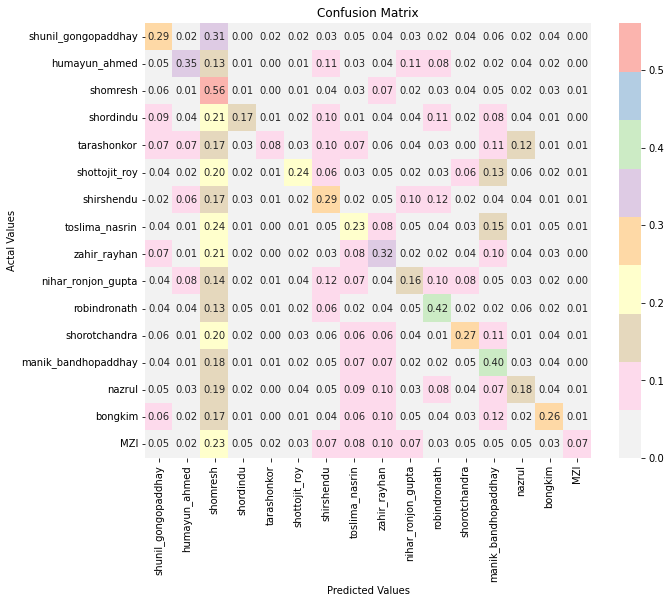

In [ ]:
# Decision Tree Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'],

                     columns = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9784786641929499
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       312
           1       1.00      0.98      0.99       188
           2       0.96      1.00      0.98      1375
           3       1.00      0.99      0.99       136
           4       1.00      0.97      0.99        72
           5       1.00      0.98      0.99       127
           6       0.99      1.00      0.99       378
           7       0.98      0.99      0.99       312
           8       0.93      1.00      0.96       411
           9       1.00      0.93      0.97       252
          10       0.97      1.00      0.98       385
          11       1.00      1.00      1.00       278
          12       0.99      0.96      0.98       590
          13       1.00      0.79      0.88       227
          14       1.00      0.95      0.97       287
          15       1.00      1.00      1.00        60

    accuracy                           0.98      539

In [ ]:
#Hyper Parameter Tuning (KNeighborsClassifier)
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8,9,10, 11, 12, 13, 14, 15, 16], 
              'p': [1, 2, 5 ,6, 8, 11, 15]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


In [ ]:
bestF.best_params_

In [ ]:
model = KNeighborsClassifier(n_neighbors=,p=2)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9781076066790353
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       312
           1       1.00      0.98      0.99       188
           2       0.96      1.00      0.98      1375
           3       0.99      0.99      0.99       136
           4       1.00      0.94      0.97        72
           5       1.00      0.97      0.98       127
           6       1.00      1.00      1.00       378
           7       0.97      0.99      0.98       312
           8       0.91      1.00      0.95       411
           9       1.00      0.94      0.97       252
          10       0.99      1.00      0.99       385
          11       1.00      0.99      1.00       278
          12       0.99      0.97      0.98       590
          13       1.00      0.78      0.88       227
          14       1.00      0.93      0.97       287
          15       1.00      1.00      1.00        60

    accuracy                           0.98      539

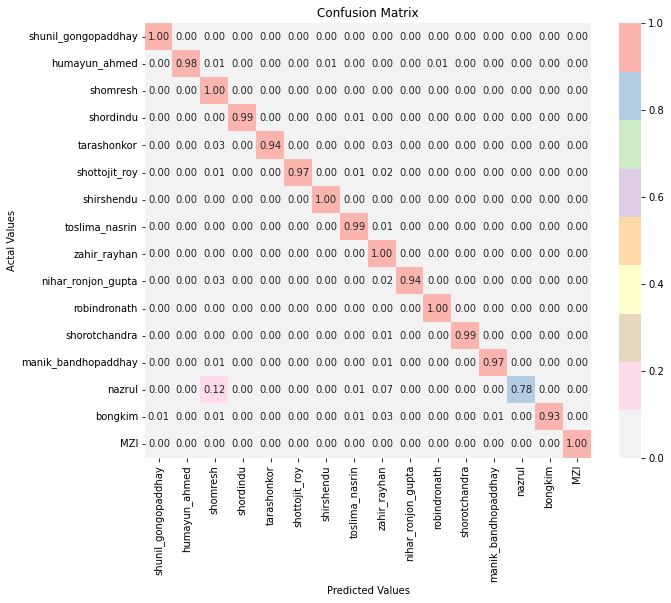

In [ ]:
# KNN Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_prediction)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'],

                     columns = ['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu', 'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin','zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath', 'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()